In [9]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [10]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [11]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [12]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[0.35411283, 0.40402114, 0.29150423],
         [0.46819338, 0.48256838, 0.21856749],
         [0.5946579 , 0.57609165, 0.15657476],
         ...,
         [0.70843804, 0.7806174 , 0.6801352 ],
         [0.70496446, 0.77705973, 0.67042494],
         [0.3029892 , 0.3353832 , 0.28085628]],

        [[0.603481  , 0.64707214, 0.2926675 ],
         [0.33043578, 0.38898832, 0.30949906],
         [0.43750444, 0.46143833, 0.23818828],
         ...,
         [0.72461694, 0.798594  , 0.6909211 ],
         [0.41374347, 0.45707616, 0.3881922 ],
         [0.11140087, 0.12469057, 0.09469794]],

        [[0.89483756, 0.92050976, 0.25458798],
         [0.67693317, 0.7164995 , 0.28813967],
         [0.40388793, 0.4584157 , 0.30497122],
         ...,
         [0.5244977 , 0.5787691 , 0.4955281 ],
         [0.12252244, 0.13709256, 0.10595948],
         [0.17252134, 0.19120401, 0.15222308]],

        ...,

        [[0.4162367 , 0.5656691 , 0.27141386],
         [0.42616203, 0.58303845, 0.28630185

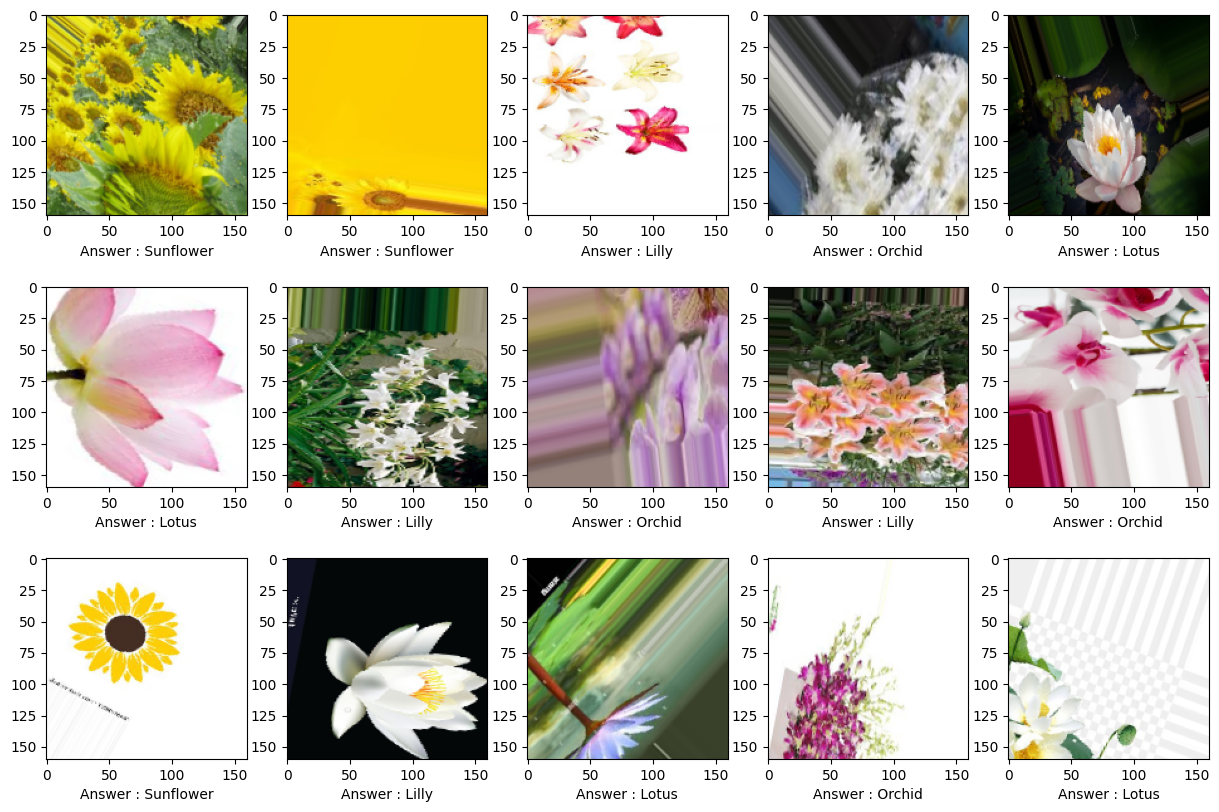

In [13]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [14]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 80, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 819200)            0         
                                                                 
 dense_2 (Dense)             (None, 400)               327680400 
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2005      
                                                      

In [15]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N08_size160_conv1-128_den1-400_epo15_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [16]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=15, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - ETA: 0s - loss: 7.5521 - accuracy: 0.4152 

C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 2146s 18s/step - loss: 7.5521 - accuracy: 0.4152 - val_loss: 1.2383 - val_accuracy: 0.5081
Epoch 2/15
120/120 [==============================] - 1225s 10s/step - loss: 1.2579 - accuracy: 0.4939 - val_loss: 1.1653 - val_accuracy: 0.5570
Epoch 3/15
120/120 [==============================] - 1180s 10s/step - loss: 1.2003 - accuracy: 0.5242 - val_loss: 1.1121 - val_accuracy: 0.5274
Epoch 4/15
120/120 [==============================] - 1160s 10s/step - loss: 1.1777 - accuracy: 0.5299 - val_loss: 1.1548 - val_accuracy: 0.5393
Epoch 5/15
120/120 [==============================] - 1147s 10s/step - loss: 1.1551 - accuracy: 0.5370 - val_loss: 1.1038 - val_accuracy: 0.5570
Epoch 6/15
120/120 [==============================] - 1071s 9s/step - loss: 1.1303 - accuracy: 0.5514 - val_loss: 1.1407 - val_accuracy: 0.5630
Epoch 7/15
120/120 [==============================] - 1175s 10s/step - loss: 1.1147 - accuracy: 0.5561 - val_loss: 1.0674 - val_accuracy: 0.57

In [17]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


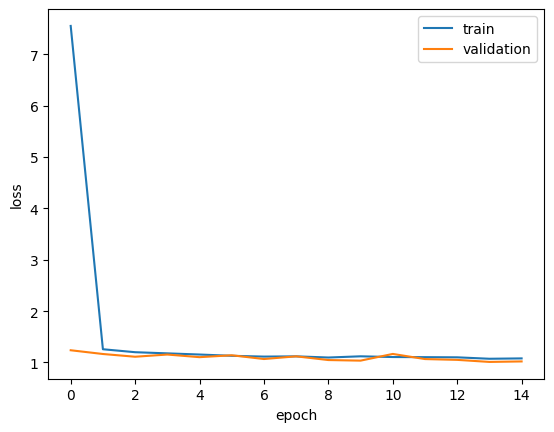

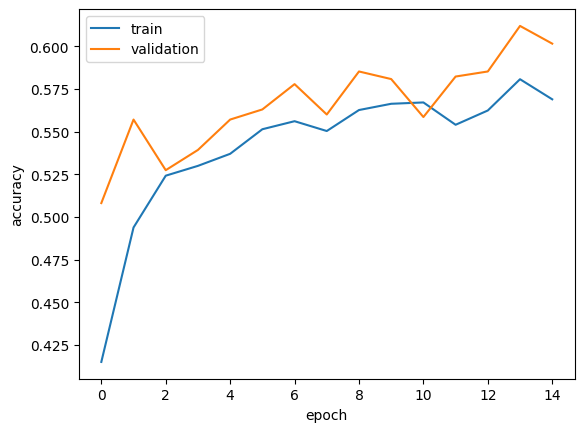

In [18]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 10s 599ms/step - loss: 0.9826 - accuracy: 0.6020


[0.9825555086135864, 0.6019999980926514]

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
[1. 0. 0. 0. 0.]
32
1/1 [==============================] - 1s 1s/step
[[3.83730590e-01 1.83498636e-01 1.42400920e-01 1.03258587e-01
  1.87111288e-01]
 [1.82669327e-01 1.97471038e-01 2.70327508e-01 4.31549706e-04
  3.49100530e-01]
 [2.49072816e-02 1.98185490e-03 2.48937460e-04 4.72246114e-12
  9.72861946e-01]
 [2.76770324e-01 5.67405634e-02 1.72894582e-01 4.60343610e-04
  4.93134201e-01]
 [5.28513610e-01 5.46599738e-02 1

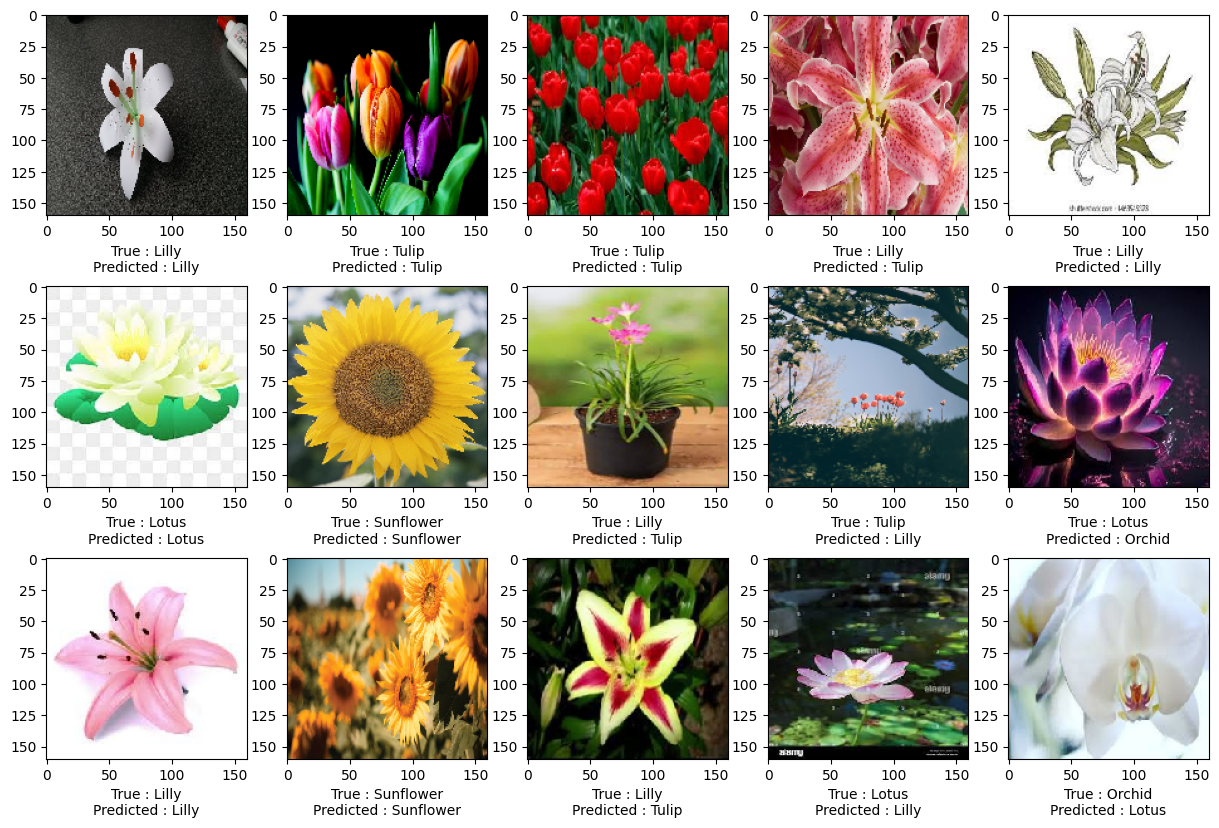

In [20]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()